Shape: (150, 5)
Tipos de dados:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


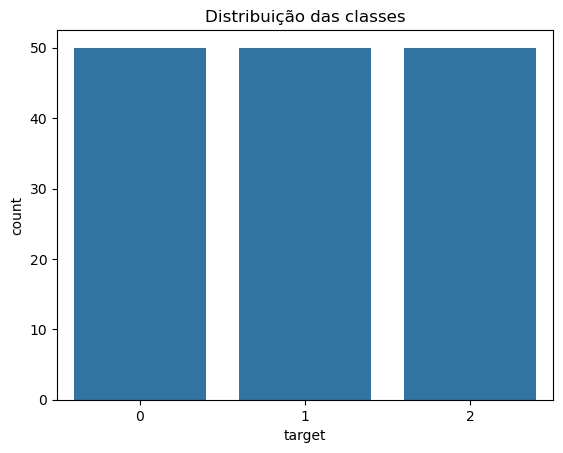

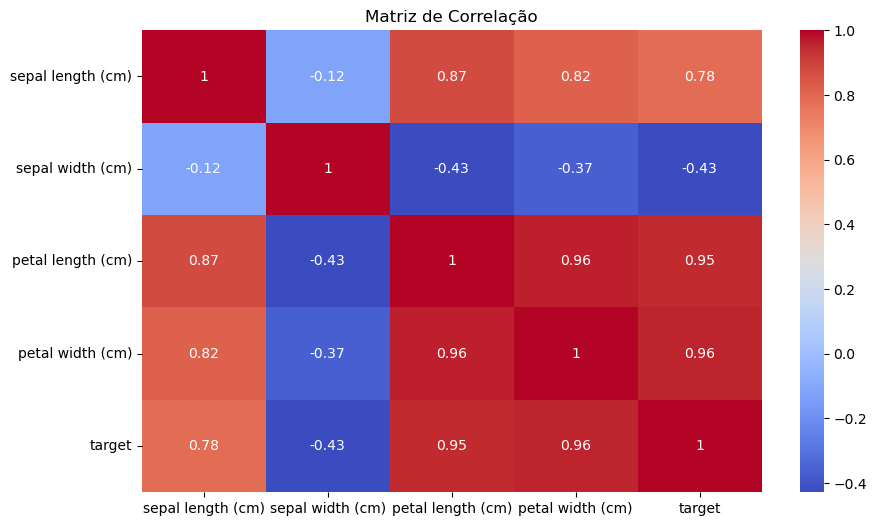

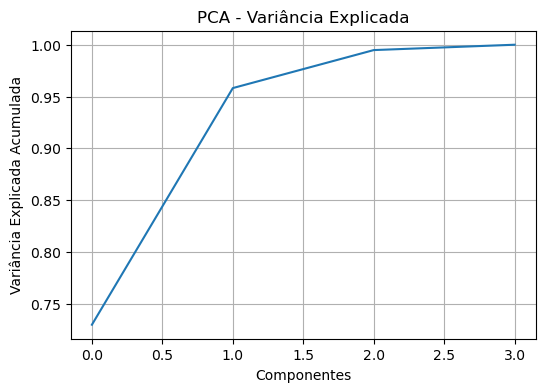

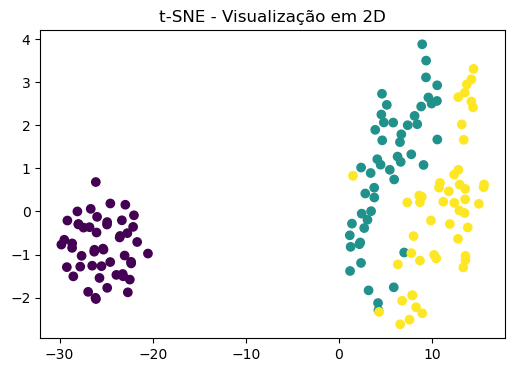


=== K-Means ===
Acurácia: 0.0667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        13
           2       0.30      0.23      0.26        13

    accuracy                           0.07        45
   macro avg       0.10      0.08      0.09        45
weighted avg       0.09      0.07      0.08        45



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


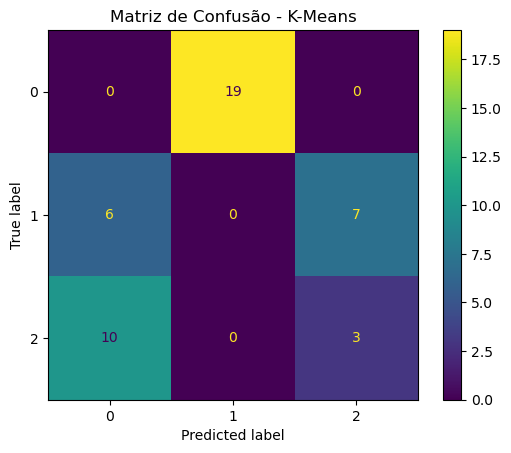

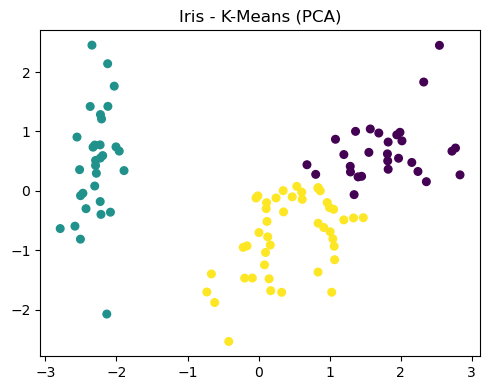


=== KNN ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



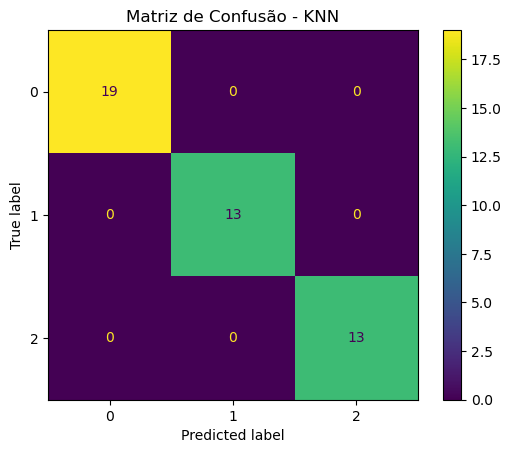

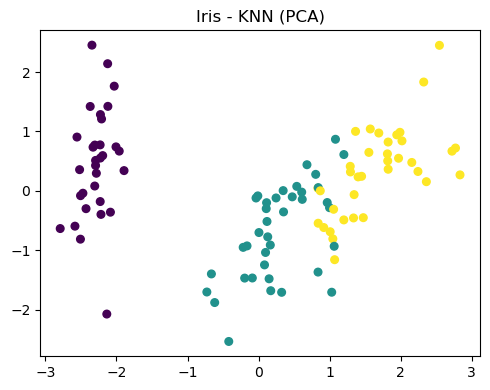


=== Random Forest ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



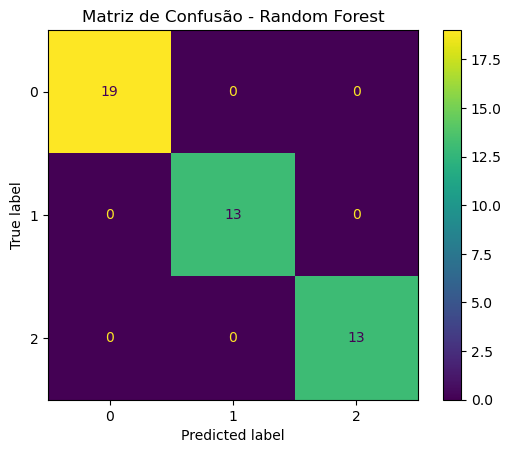

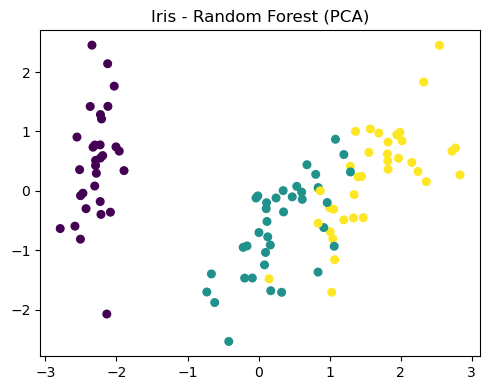


=== XGBoost ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\joao_\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:39:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


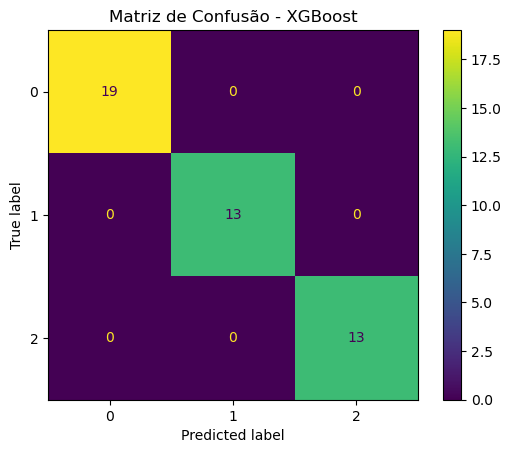

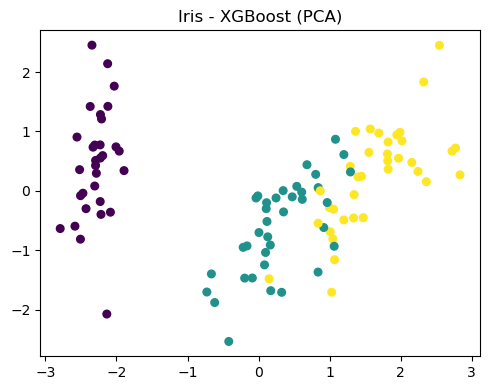


=== MLP ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


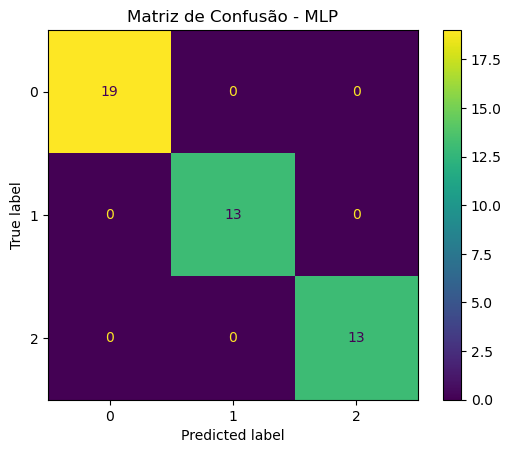

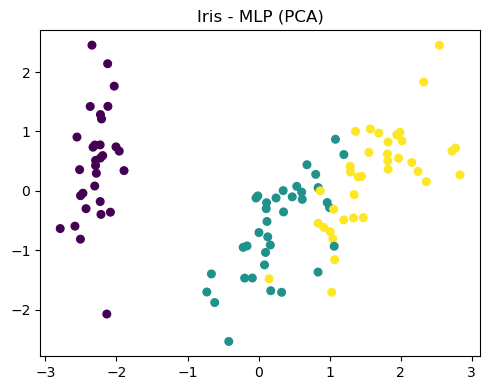


Tabela Comparativa de Modelos


,Modelo,Acurácia
1,KNN,1.000000
2,Random Forest,1.000000
3,XGBoost,1.000000
4,MLP,1.000000
0,K-Means,0.066667


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# Carregando o dataset
# ========================
X, y = load_iris(return_X_y=True, as_frame=True)
df = X.copy()
df['target'] = y

# ========================
# Análise Exploratória
# ========================
print("Shape:", df.shape)
print("Tipos de dados:")
print(df.dtypes)
display(df.describe())

# Distribuição das classes
sns.countplot(x='target', data=df)
plt.title("Distribuição das classes")
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# PCA - Variância explicada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("PCA - Variância Explicada")
plt.grid(True)
plt.show()

# t-SNE para visualização
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
plt.title("t-SNE - Visualização em 2D")
plt.show()

# ========================
# Treinamento de modelos
# ========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_vis = PCA(n_components=2).fit_transform(X_train)

models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "MLP": MLPClassifier(max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append({"Modelo": name, "Acurácia": acc})
    
    print("Acurácia:", round(acc, 4))
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()
    
    # Visualização com PCA
    try:
        y_vis_pred = model.predict(X_train)
        plt.figure(figsize=(5, 4))
        plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis_pred, cmap="viridis", s=30)
        plt.title(f"Iris - {name} (PCA)")
        plt.tight_layout()
        plt.show()
    except:
        pass

# ========================
# Resultados Finais
# ========================
df_resultados = pd.DataFrame(results)
df_resultados = df_resultados.sort_values("Acurácia", ascending=False)
print("\nTabela Comparativa de Modelos")
display(df_resultados)
